# General Stuff

Importing libraries that we will use:

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Initialization of variables/lists:

In [2]:
states_versus_time=[]

Roll the dice (i.e. produce a bunch of random numbers between 1 and 6) and store results in a list. Each item in this list is a sample:

In [3]:
for x in range(0, 1200):
    states_versus_time.append(random.randrange(1, 7, 1))

Plot the list (this list is the "Trace"):

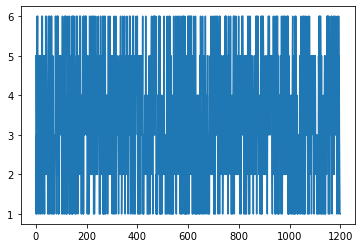

In [4]:
plt.plot(states_versus_time);

Another way of looking at this data is a histogram. A histogram allows you to easily see what the underlying probability distribution is:

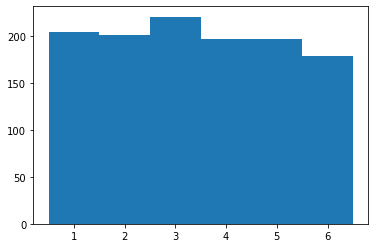

In [5]:
bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5]
plt.hist(states_versus_time,bins);

This is what the trace looks like if you draw from a Lorentzian distribution:

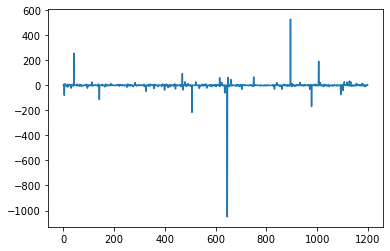

In [6]:
states_versus_time_lor=[]
# note: `range(N)` runs from 0 .. N-1
for x in range(1200):
    states_versus_time_lor.append(np.random.standard_cauchy(size=None))
plt.plot(states_versus_time_lor);

And this is the corresponding histogram - it looks like a "Lorentz curve":

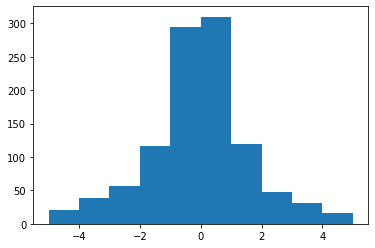

In [7]:
plt.hist(states_versus_time_lor,bins=(-5,-4,-3,-2,-1,0,1,2,3,4,5));

# Mean and Variance

We can use the Numpy library to compute the mean value and the variance of all the data points:

In [8]:
np.mean(states_versus_time)

3.430833333333333

In [9]:
np.var(states_versus_time)

2.8285493055555557

# Law of large numbers

Now let's look into the law of large numbers. For that we will first erase all previous data to start over:

In [10]:
states_versus_time=[]
averages=[]
variances=[]

And now lets create a large set of random numbers, but this time we compute the mean and the variance each time we added a new random number to the list, so we can monitor how mean and variance change as the trace gets longer and longer:

In [11]:
for x in range(10000):
    states_versus_time.append(random.randrange(1, 7, 1))
    averages.append(np.mean(states_versus_time))
    variances.append(np.var(states_versus_time))

First we plot the result for the mean values:

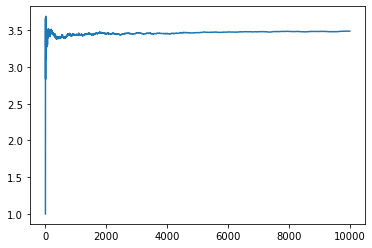

In [12]:
plt.plot(averages);

And now we plot it for the variances:

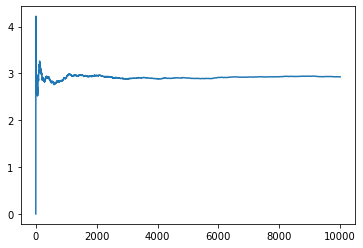

In [13]:
plt.plot(variances);

This is what it would look like for the Lorentzian distribution:

In [14]:
states_versus_time_lor=[]
averages=[]
variances=[]
for x in range(30000):
    states_versus_time.append(np.random.standard_cauchy(size=None))
    averages.append(np.mean(states_versus_time))
    variances.append(np.var(states_versus_time))

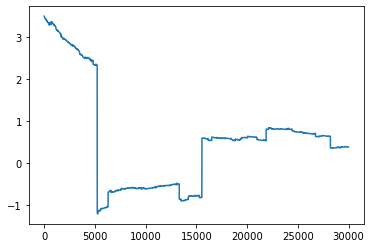

In [15]:
plt.plot(averages);

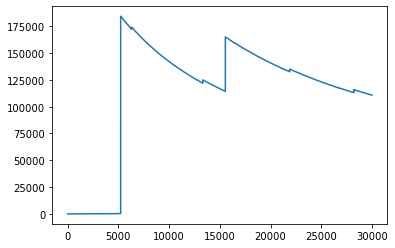

In [16]:
plt.plot(variances);

# Central Limit Theorem

Earlier we studied the histogram for rolling dice once. What does this look like if we roll the dice twice and average the outcome?

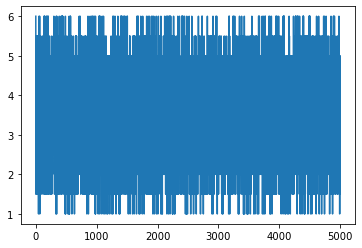

In [17]:
states_versus_time2=[]
for x in range(5000):
    s = 0.5*(random.randrange(1, 7, 1) + random.randrange(1, 7, 1))
    states_versus_time2.append(s)
plt.plot(states_versus_time2);

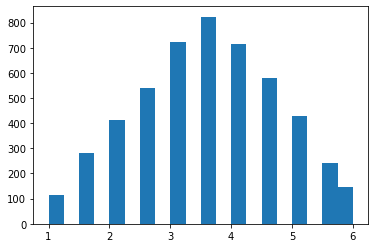

In [18]:
plt.hist(states_versus_time2,bins=20);

And now let's do the same with the average over five dice rolls:

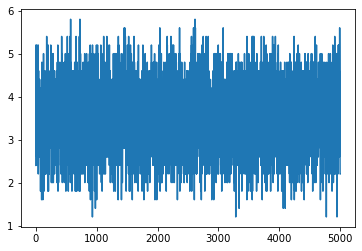

In [19]:
states_versus_time2=[]
for x in range(5000):
    s = 0.2*(random.randrange(1, 7, 1) +
             random.randrange(1, 7, 1) +
             random.randrange(1, 7, 1) +
             random.randrange(1, 7, 1) +
             random.randrange(1, 7, 1))
    states_versus_time2.append(s)
plt.plot(states_versus_time2);

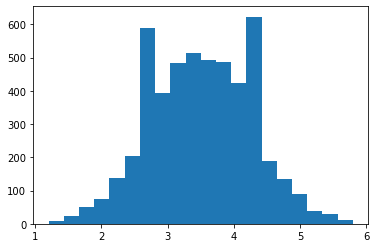

In [20]:
plt.hist(states_versus_time2,bins=20);

The histogram for the average of 10 times rolling dice looks already very much like a Gaussian distribution:

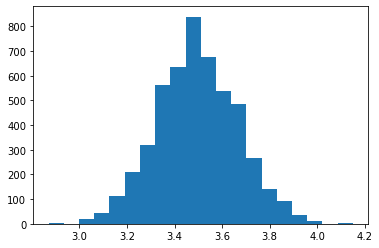

In [21]:
states_versus_time2=[]
N=100
for x in range(5000):
    s=sum(random.randrange(1, 7, 1) for _ in range(N))/N
    states_versus_time2.append(s)
plt.hist(states_versus_time2,bins=20);

# Autocorrelation

A brief note about python syntax: sometimes you want to do a loop a certain number of times, but you don't care about the counter; that's what the `_` is for: it's a reserved name that tells python "I don't care about the value of this thing". It's great for loops like this:

In [22]:
states_versus_time=[]
for _ in range(1000):
    states_versus_time.append(random.randrange(1, 7, 1))

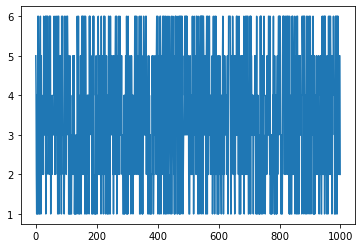

In [23]:
plt.plot(states_versus_time);

The following code evaluates the estimater of the autocorrelation of this data:

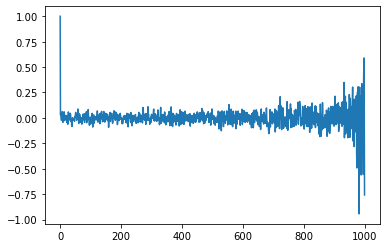

In [24]:
mean=np.mean(states_versus_time)
var=np.var(states_versus_time)
acf_as=[]
for i in range(len(states_versus_time)):
    acf = 0
    for j in range(len(states_versus_time)-i):
        acf += (states_versus_time[j]-mean)*(states_versus_time[j+i]-mean)
    acf *= 1/(var*(len(states_versus_time)-i))
    acf_as.append(acf)
plt.plot(acf_as);

The following one-liner does the same:

In [25]:
def acf_calc(v):
    """Returns the auto-correlation function for the sequence v"""
    v_ave = np.mean(v)
    v_len = len(v)
    return np.correlate(v-v_ave, v-v_ave, "full")[(v_len-1):] / \
        (np.var(v)*np.array([v_len - x for x in range(v_len)]))

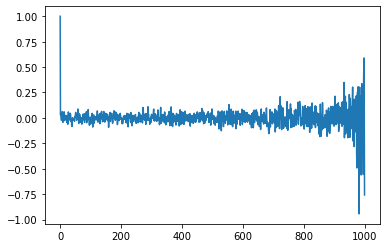

In [26]:
plt.plot(acf_calc(states_versus_time));

In [27]:
?acf_calc

In order to understand why the autocorrelation becomes very large towards the end, please check the formula that you evaluate. It simply is based on very few data points and, hence, is not reliable.

Now compare what this looks like when the data contains a sine function:

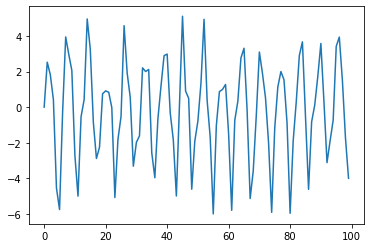

In [28]:
states_versus_time=[]
for x in range(100):
    states_versus_time.append(random.randrange(1, 7, 1)*np.sin(x))
plt.plot(states_versus_time);

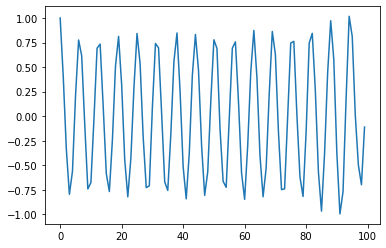

In [29]:
plt.plot(acf_calc(states_versus_time));

Now lets see if we can trick the system by copying the array so that we effectively have two times as much data:

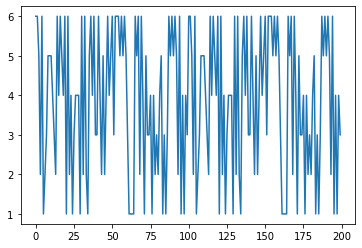

In [30]:
states_versus_time=[]
for x in range(100):
    states_versus_time.append(random.randrange(1, 7, 1))
states_versus_time.extend(states_versus_time)
# states_versus_time.extend(states_versus_time[:20])
plt.plot(states_versus_time)

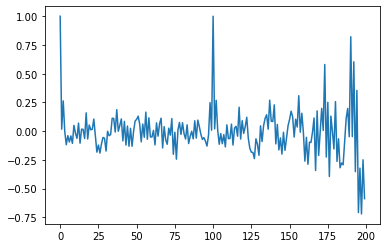

In [31]:
plt.plot(acf_calc(states_versus_time));

As you can see this introduces correlation!

# Binning

We also talked about how binning can reduce correlations. Let's look at this using our example of a sine function. First we create the trace:

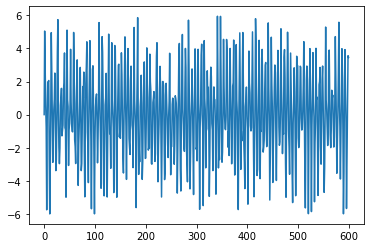

In [32]:
states_versus_time=[]
for x in range(600):
    states_versus_time.append(random.randrange(1, 7, 1)*np.sin(x))
plt.plot(states_versus_time);

The autocorrelation function looks like this:

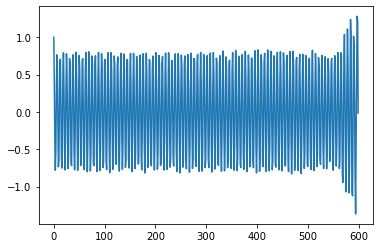

In [33]:
plt.plot(acf_calc(states_versus_time));

And now we use a binning length of 6 to average:

In [34]:
states_versus_time2=[]
N=6
for x in range(600//N):
    s = sum(states_versus_time[x*N+y] for y in range(N))/N
    states_versus_time2.append(s)

The trace now looks like this:

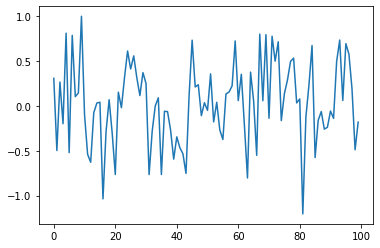

In [35]:
plt.plot(states_versus_time2);

And the autocorrelation function like this:

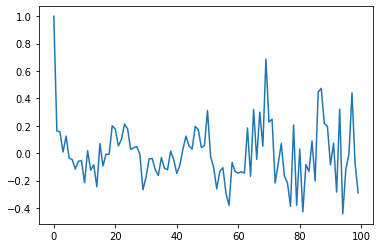

In [36]:
plt.plot(acf_calc(states_versus_time2));